<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/5_regession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

- linear regression

- ridge regression

- LASSO

- robust linear regression

$y$ is the dependent variable or response. $x_j$ is the independent variable or feature. 

We have the training data $(\mathbf{x}^{(i)}, y^{(i)})_{i=1}^N$. 

Linear regression is extremely useful both conceptually and practically.

## Linear regression
### Overview

- It assumes the dependence of outcome $y$ on input $x_1, x_2, \dots, x_d$ is linear. 

- The model of the following form, $p(y|\mathbf{x}, \theta)=\mathcal{N}(y|\mathbf{w}^\top \mathbf{x}, \sigma^2)$, where $\theta=(\mathbf{w},\sigma^2)$ are all the parameter of the model. We usually assume $\mathbf{x}=[1, x_1, x_2, \dots, x_d]$, so we can absorb the intercept term $w_0$.

- $\epsilon_i = y^{(i)}-(\mathbf{w}^\top\mathbf{x}^{(i)})$ is the residual error for the $i$-th sample, which assumes follows the Gaussian distribution with mean 0 and variance $\sigma^2$.

- In general a straight line will not provide a good fit to most datasets. We can apply a nonlinear transformation to the input features, by replacing $\mathbf{x}$ with $\phi(\mathbf{x})$ to get
$$p(y|\mathbf{x}, \theta) = \mathcal{N}(y|\mathbf{w}^\top \phi(\mathbf{x}), \sigma^2) $$
As long as $\phi$ is fixed, the model remains linear in the parameter. One possible choice is to use a polynomial expansion of degree $d$.

### Least square estimation

- $\frac{1}{2}\sum\epsilon_i^2=\frac{1}{2}\|\mathbf{\epsilon}\|_2^2$ is the residue sum of squares (RSS). 
$$\text{RSS}(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N (y^{(i)}-\mathbf{w}^\top \mathbf{x}^{(i)})^2=\frac{1}{2}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2 = \frac{1}{2}(\mathbf{X}\mathbf{w}-\mathbf{y})^\top(\mathbf{X}\mathbf{w}-\mathbf{y}) $$
In regression, $N\gg d+1$ so usually $\text{rank}(\mathbf{X})=d+1$ is of full rank. 

- The gradient is 
$ \nabla \text{RSS}(\mathbf{w})=\mathbf{X}^\top\mathbf{X} \mathbf{w}-\mathbf{X}^\top\mathbf{y}$. So to solve 
$$\mathbf{X}^\top\mathbf{X} \mathbf{w}=\mathbf{X}^\top\mathbf{y} $$
The ordinary least square solution is $\hat{\mathbf{w}}= (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$. 

- If $\mathbf{X}$ is full rank, the hessian of RSS$(\mathbf{w})$ is $\mathbf{X}^\top\mathbf{X}$ is PD. The least square solution is unique. 

- The quantity $\mathbf{X}^\dagger = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top$ is the left pseudo inverse of the non-square matrix $\mathbf{X}$. 





### Geometric interpretation 
The projection matrix Proj$(\mathbf{X})=\mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top$. The projective value of $\mathbf{y}$ is given by 
$$ \hat{\mathbf{y}} = \mathbf{X} \mathbf{w} = \text{Proj}(\mathbf{X})\mathbf{y}$$

Note $\mathbf{X}^\top (\mathbf{y}-\hat{\mathbf{y}})=0$, so the residual vector to be orthogonal to the span$(\mathbf{X})$.

In [63]:
%pylab inline 
from IPython.display import Image

Image(url='https://github.com/yexf308/MAT592/blob/main/image/11.3.png?raw=true', width=600)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


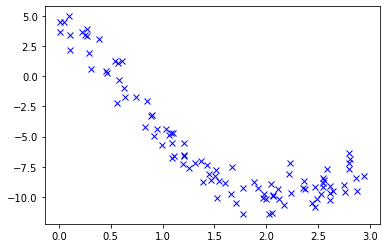

In [64]:

# generate sample with error
x = 3 * random.rand(100) # between 0 and 3
e = 1 * random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*cos(x+1) + e;  plot(x,y,'bx');

[ 1.30336216 -4.63477124]
[ 1.30336216 -4.63477124]


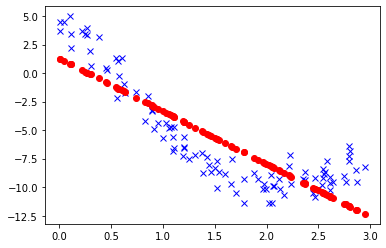

In [65]:
# linear model f(x) = w0 + w1 x
X = np.ones((x.size,2));
X[:,1] = x


# Bad, unstable 
Xpinv = inv(X.T.dot(X)).dot(X.T)
w = Xpinv.dot(y)
print(w)


# Better(use pseudo inverse )

H = X.dot(linalg.pinv(X)) 
yHat = H.dot(y)


# Best (use qr), most stable
q, r = linalg.qr(X);
w    = linalg.solve(r, q.T.dot(y))
print(w)
yHat = X.dot(w)
y_residue1 = y - yHat
plot(x,y,'bx');
plot(x,yHat,'ro');

In [66]:
def RSS(y_residue):
  return np.sqrt(1/y_residue.size * np.sum(y_residue**2))

print(RSS(y_residue1))  

2.4044377709443676


[  6.17396423 -14.4428176    3.28638427]
1.0806926310571732


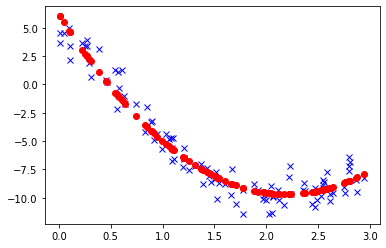

In [67]:
# linear model f(x) = w0 + w1 x + w2 * x^2
X2 = np.ones((x.size,3));
X2[:,1] = x # partials wrt. w1
X2[:,2] = x**2 # wrt. w2

H2 = dot(X2,linalg.pinv(X2))
yHatQ2 = dot(H2,y)

# Best (use qr), most stable
q, r = linalg.qr(X2);
w2    = linalg.solve(r, q.T.dot(y))
print(w2)


y_residue2 = y - yHatQ2;
plot(x,y,'bx'); plot(x,yHatQ2,'ro');

print(RSS(y_residue2))  

0.7338991907145795
0.9462444273839061


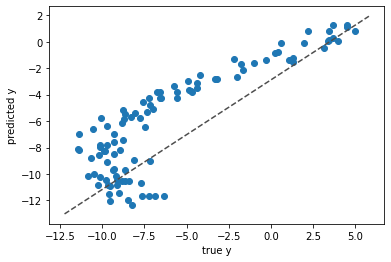

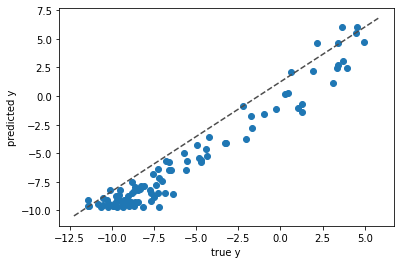

In [68]:
fig, ax = plt.subplots()
ax.scatter(y,yHat)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel('true y')
ax.set_ylabel('predicted y')

fig, ax = plt.subplots()
ax.scatter(y,yHatQ2)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel('true y')
ax.set_ylabel('predicted y')


import sklearn.metrics 
from sklearn.metrics import r2_score

print(r2_score(y,yHat))
print(r2_score(y,yHatQ2))



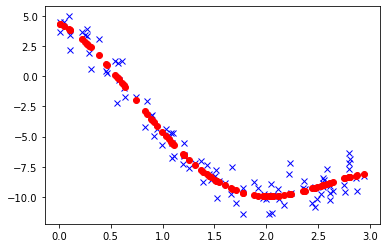

In [73]:
# Let's try to "overfitting"
# linear model f(x) = w0 + w1 x + w2 * x^2 + w3 * x^3 + w4 * x^4 
X4 = np.ones((x.size,5));
X4[:,1] = x # partials wrt. w1
X4[:,2] = x**2 # wrt. w2
X4[:,3] = x**3 # wrt. w3
X4[:,4] = x**4 # wrt. w4


H4 = dot(X4,linalg.pinv(X4))
yHatQ4 = dot(H4,y)
y_residue4 = y - yHatQ4;
plot(x,y,'bx'); plot(x,yHatQ4,'ro');

# lets look at these coeffifients 
q, r = linalg.qr(X4);
w4    = linalg.solve(r, q.T.dot(y))


In [74]:
print(RSS(y_residue1))
print(RSS(y_residue2))
print(RSS(y_residue4),'\n')

print(r2_score(y,yHat))
print(r2_score(y,yHatQ2))
print(r2_score(y,yHatQ4),'\n')

print(w)
print(w2)
print(w4)

2.4044377709443676
1.0806926310571732
0.9551274685723031 

0.7338991907145795
0.9462444273839061
0.9580103956559278 

[ 1.30336216 -4.63477124]
[  6.17396423 -14.4428176    3.28638427]
[  4.3475196   -3.40626193 -11.39692723   6.85584688  -1.04640039]


In [90]:
# let's do some test set
x_test = 1 * random.rand(20)+4 # between 4 and 5
e = 1 * random.randn(x_test.size) # noise
y_test = 10*cos(x_test+1) + e;  


X_test = np.ones((x_test.size,2));
X_test[:,1] = x_test

X2_test = np.ones((x_test.size,3));
X2_test[:,1] = x_test # partials wrt. w1
X2_test[:,2] = x_test**2 # wrt. w2

X4_test = np.ones((x_test.size,5));
X4_test[:,1] = x_test # partials wrt. w1
X4_test[:,2] = x_test**2 # wrt. w2
X4_test[:,3] = x_test**3 # wrt. w3
X4_test[:,4] = x_test**4 # wrt. w4

yHat1_test = X_test.dot(w)
yHat2_test = X2_test.dot(w2)
yHat4_test = X4_test.dot(w4)

print(RSS(y_test - yHat1_test ))
print(RSS(y_test - yHat2_test))
print(RSS(y_test - yHat4_test),'\n')


26.49740827951689
3.1896288637856114
59.58196101615836 



## Ridge regression

The polynomial regression with too high of a degree may have overfitting issue. One solution is to reduced the degree of the polynomial. However, a more general solution is to penalize the magnitude of the regression coefficients. We will use the following Ridge regression (Tikhonov regularization), the loss function is 
$$\text{RSS}(\mathbf{w})=\frac{1}{2}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 +\frac{1}{2}\lambda \|\mathbf{w}\|_2^2  $$
where $\lambda>0$ is pre-determined penalty parameter. 

- $\lambda=0$, reduce to least square. $\lambda=+\infty$,  $w=0$.

- The gradient is $\nabla\text{RSS}(\mathbf{w})= \mathbf{X}^\top\mathbf{X} \mathbf{w}-\mathbf{X}^\top\mathbf{y}+\lambda \mathbf{w} $

- $\hat{\mathbf{w}}=(\mathbf{X}^\top\mathbf{X}+\lambda \mathbf{I}_d)^{-1}\mathbf{X}^\top \mathbf{y}$, Note $\mathbf{X}^\top\mathbf{X}+\lambda \mathbf{I}_d$ is PD.

- $\tilde{\mathbf{X}}=\begin{bmatrix} \mathbf{X} \\ \sqrt\Lambda \end{bmatrix}$ and $\tilde{\mathbf{y}}= \begin{bmatrix} \mathbf{y} \\ 0 \end{bmatrix}$, where $\sqrt{\Lambda}$ is a diaginal matrix with $\sqrt{\lambda}$. 
In fact, $\hat{\mathbf{w}}= (\tilde{\mathbf{X}}^\top \tilde{\mathbf{X}})^{-1}\tilde{\mathbf{X}}^\top \tilde{\mathbf{y}} $. 



[ 3.65347625 -5.71324171 -4.04399841  1.98320356 -0.12168961]
21.68045318476358


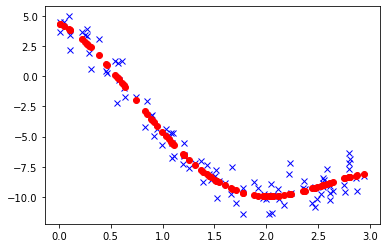

In [93]:
# it is bad idea to use the matrix inversion
# We can turn this problem into a regression problem previously solved.
l = 1;
sq_Lambda = diag(ones(5)*sqrt(l)) 

X4_tilde = np.vstack([X4, sq_Lambda])
y_tilde  = append(y, zeros(5))

# use the lease square result
H4_tilde = dot(X4_tilde,linalg.pinv(X4_tilde))
yHatQ4_tilde = dot(H4_tilde,y_tilde)

plot(x,y,'bx'); plot(x,yHatQ4[0:y.size],'ro');


q, r = linalg.qr(X4_tilde);
w4_tilde    = linalg.solve(r, q.T.dot(y_tilde))
print(w4_tilde)

yHat4_tilde_test = X4_test.dot(w4_tilde)
print(RSS(y_test - yHat4_tilde_test))

# verify with the matrix inverse (you should not use this method)
#Xpinv = inv(X4.T.dot(X4)+diag(ones(5)*l)).dot(X4.T)
#w = Xpinv.dot(y)
#print(w)




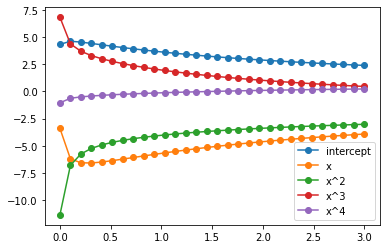

In [113]:
# how does these coefficient behave with the choice of lambda

l_span   = linspace(0,3,30)
w4_store = zeros((30, 5))
error_store = zeros(30)

for index in range(len(l_span)):
  l         = l_span[index]
  sq_Lambda = diag(ones(5)*sqrt(l)) 
  X4_tilde  = np.vstack([X4, sq_Lambda])
  y_tilde   = append(y, zeros(5))
  q, r       = linalg.qr(X4_tilde);
  w4_tilde    = linalg.solve(r, q.T.dot(y_tilde))
  w4_store[index,:] = w4_tilde
  yHat4_tilde_test = X4_test.dot(w4_tilde) 
  error_store[index] = RSS(y_test - yHat4_tilde_test)


fig, ax = plt.subplots()
ax.plot(l_span, w4_store[:,0],'-o',label='intercept')
ax.plot(l_span, w4_store[:,1],'-o',label='x')
ax.plot(l_span, w4_store[:,2],'-o',label='x^2')
ax.plot(l_span, w4_store[:,3],'-o',label='x^3')
ax.plot(l_span, w4_store[:,4],'-o',label='x^4')
leg = ax.legend();
 


[ 4.30774515 -6.51333616 -4.92974867  3.01872119 -0.35504346]


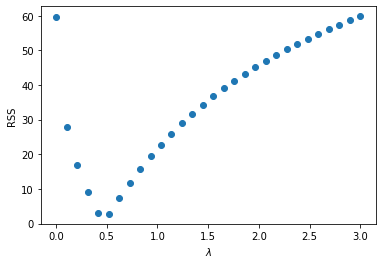

In [108]:

fig, ax = plt.subplots()
ax.scatter(l_span, error_store)
ylabel('RSS')
xlabel('$\lambda$')

print(w4_store[4,:])